<a href="https://colab.research.google.com/github/Abinayak03/Unsupervised-learning/blob/main/K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [3]:
df.shape

(22, 3)

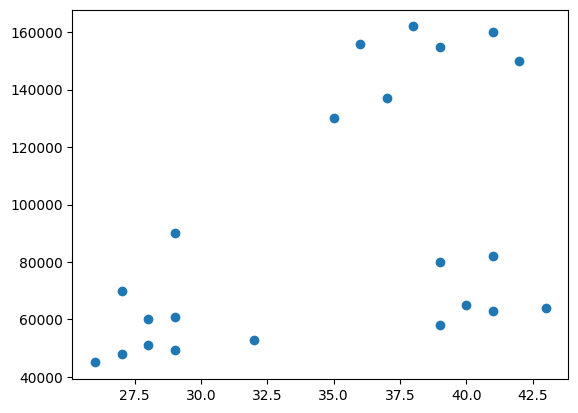

In [4]:
plt.scatter(df['Age'],df['Income($)'])
plt.show()

In [5]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(df[['Age','Income($)']])
model.labels_

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [6]:
df['clusters'] = model.labels_
df.head()

,Name,Age,Income($),clusters
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


<Axes: xlabel='Age', ylabel='Income($)'>

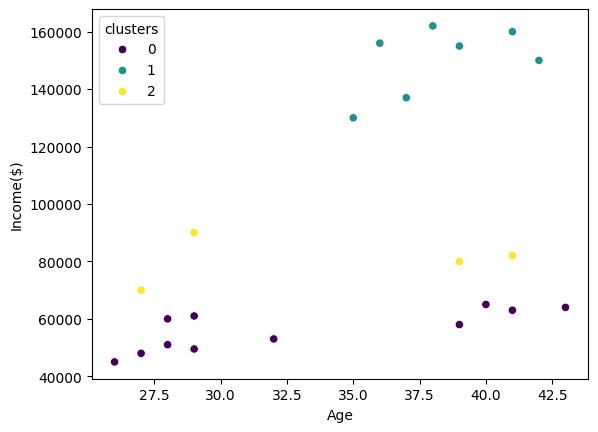

In [7]:
sns.scatterplot(x='Age',y='Income($)',palette='viridis',hue='clusters',data=df)

the above clusters are not clear that is beacuse of not scaling

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(columns=['Age','Income($)'])
df_scaled[['Age','Income($)']] = scaler.fit_transform(df[['Age','Income($)']])
df_scaled.head()

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


In [9]:
model = KMeans(n_clusters=3)
model.fit(df_scaled[['Age','Income($)']])
model.labels_

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [10]:
df_scaled['clusters'] = model.labels_
df_scaled.head()

,Age,Income($),clusters
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,1


<Axes: xlabel='Age', ylabel='Income($)'>

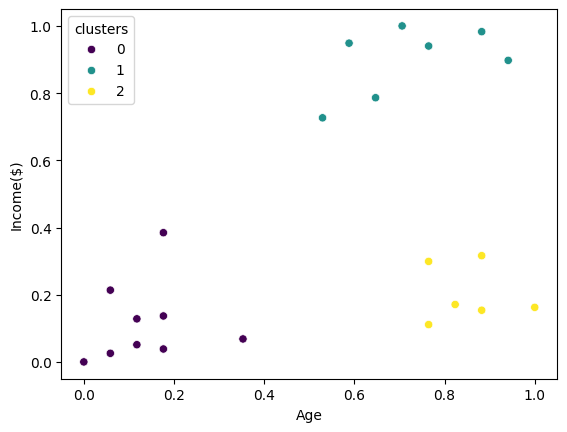

In [11]:
sns.scatterplot(x='Age',y='Income($)',palette='viridis',hue='clusters',data=df_scaled)

In [12]:
centroids = model.cluster_centers_  #centroid of each clusters
centroids

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [13]:
model.inertia_ #sum of squared distance

0.4750783498553097

<Axes: xlabel='Age', ylabel='Income($)'>

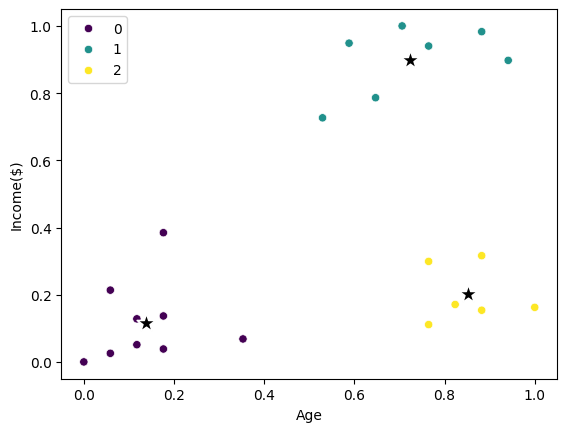

In [14]:
sns.scatterplot(x='Age',y='Income($)',palette='viridis',hue='clusters',data=df_scaled)
sns.scatterplot(x=centroids[:,0],y=centroids[:,1],color='black',s=200,marker="*")

In [15]:
sse = []

for i in range(1,11):
  model=KMeans(n_clusters=i)
  model.fit(df_scaled[['Age','Income($)']])
  sse.append(model.inertia_)

sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2860717106689441,
 0.21552563314755377,
 0.1878572831460775,
 0.15525565952103085,
 0.1252668649416942,
 0.10252533352746288]

it can be clearly seen that the elbow point is i=3
as the changes are less from i=3

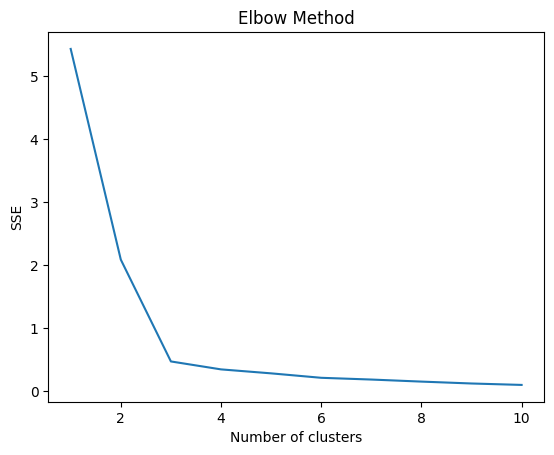

In [16]:
plt.plot(range(1,11),sse)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()